# **YOUTUBE_TRENDING_VIDEOS_ANALYSIS**

---

**Name: Adhil Kappann**  
**Organization: Entri Elevate**  
**Date:** [Evaluation Date]  

---

## Overview of Problem Statement
With the rise of digital content consumption, YouTube has become one of the most influential platforms for video sharing. Identifying trends in YouTube videos can provide valuable insights for content creators, marketers, and data analysts. Understanding what factors contribute to a video's popularity can help in content strategy, audience targeting, and optimizing video engagement. This project aims to analyze YouTube trending videos to uncover patterns, trends, and key factors that drive video virality.

## Objective

To develop a data-driven analysis of YouTube trending videos, exploring patterns in video characteristics, audience engagement metrics, and trends over time. This project aims to:
- Identify key factors influencing video virality, such as video length, category, and posting time.
- Analyze user interaction patterns, including likes, comments, and shares.
- Provide insights into optimizing video content for better reach and engagement.
- Compare engagement trends across different categories and regions.
- Leverage statistical analysis and machine learning techniques to predict video popularity.
- Assist content creators and marketers in enhancing their strategies for audience growth and visibility.

## Data Description
- **Source:** https://data.world/iamdilan/youtube-dataset/workspace/file?filename=youtube.xlsx
- **Features:** The YouTube Trending Videos dataset contains metadata, engagement metrics, and additional information about videos that appeared on the trending list. The dataset includes 17 input variables and 1 target variable.

### Input Variables
- **video_id:** Unique identifier for the video.
- **trending_date:** The date when the video appeared on YouTube’s trending list.
- **title:** The title of the video.
- **channel_title:** The name of the YouTube channel that uploaded the video.
- **category_id:** The numerical ID representing the category assigned to the video.
- **publish_date:** The exact date when the video was published.
- **time_frame:** The time period associated with the video’s publishing trend.
- **published_day_of_week:** The day of the week when the video was published.
- **publish_country:** The country where the video was published.
- **tags:** Keywords and hashtags used by the creator to describe the video.
- **views:** The total number of times the video has been watched.
- **likes:** The number of likes the video has received.
- **dislikes:** The number of dislikes received (if available).
- **comment_count:** The total number of comments posted on the video.
- **comments_disabled:** Indicates if comments are disabled for the video (`yes`/`no`).
- **ratings_disabled:** Indicates if ratings (likes/dislikes) are disabled for the video (`yes`/`no`).
- **video_error_or_removed:** Indicates if the video has been removed or has errors (`yes`/`no`).

### Target Variable
- **category_id:** The numerical identifier representing the category of the video, used for classification.

### Dataset Details
The dataset contains multiple records of trending videos collected over time, capturing key characteristics and engagement levels to analyze trends in video popularity. It consists of a mix of categorical and numerical variables that provide insights into video performance on YouTube.


#### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Data Collection
- Importing the dataset from the specified source.
- The data was collect from Dataworld
- Loading the data into a Pandas DataFrame for analysis.
- Gain insights into the data distribution, relationships, and potential patterns.

In [5]:
data=pd.read_csv('youtube_trending.csv')

In [6]:
df=pd.DataFrame(data)

In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [8]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False
161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False
161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False
161468,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False
161469,POTgw38-m58,18.14.06,ã€å®Œæ•´ç‰ˆã€‘é‡åˆ°ææ€–æƒ…äººè©²æ€Žéº¼è¾¦ï...,æˆ‘æ„›å°æ˜Žæ˜Ÿå¤§è·Ÿç­,24,2018-06-13,16:00 to 16:59,Wednesday,CANADA,"å³å®—æ†²|""å³å§å„’""|""å°æ˜Žæ˜Ÿå¤§è·Ÿç­""|""Sa...",107392,300,62,251,False,False,False


## Exploratory Data Analysis (EDA)

In [10]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_date', 'time_frame', 'published_day_of_week',
       'publish_country', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

In [11]:
df.shape

(161470, 17)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,161470.0,1.946115e+01,7.432001e+00,1.0,15.00,23.0,24.00,44.0
views,161470.0,2.419854e+06,1.043749e+07,223.0,101538.25,384739.5,1339528.00,424538912.0
likes,161470.0,6.566194e+04,2.260617e+05,0.0,1975.00,9840.0,40062.75,5613827.0
dislikes,161470.0,3.490153e+03,3.114779e+04,0.0,85.00,348.0,1350.00,1944971.0
comment_count,161470.0,7.035494e+03,3.404121e+04,0.0,279.00,1144.0,4144.75,1626501.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                159671 non-null  object
 1   trending_date           161470 non-null  object
 2   title                   161470 non-null  object
 3   channel_title           161468 non-null  object
 4   category_id             161470 non-null  int64 
 5   publish_date            161470 non-null  object
 6   time_frame              161470 non-null  object
 7   published_day_of_week   161470 non-null  object
 8   publish_country         161470 non-null  object
 9   tags                    161470 non-null  object
 10  views                   161470 non-null  int64 
 11  likes                   161470 non-null  int64 
 12  dislikes                161470 non-null  int64 
 13  comment_count           161470 non-null  int64 
 14  comments_disabled       161470 non-n

In [14]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_date              object
time_frame                object
published_day_of_week     object
publish_country           object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
dtype: object

### Data Preprocessing and Cleaning

In [16]:
df.isnull().sum()

video_id                  1799
trending_date                0
title                        0
channel_title                2
category_id                  0
publish_date                 0
time_frame                   0
published_day_of_week        0
publish_country              0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
dtype: int64

In [17]:
#Drop rows where 'video_id' is missing (since it is a unique identifier)
df1=df.dropna(subset=['video_id'])

#Fill missing 'channel_title' with 'Unknown' (since only 2 values are missing)
df1['channel_title'].fillna('Unknown', inplace=True)

In [18]:
df1.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_date              0
time_frame                0
published_day_of_week     0
publish_country           0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [19]:
df1.duplicated().sum()

217

In [20]:
df2=df1.drop_duplicates()

In [21]:
df2.duplicated().sum()

0

In [22]:
target_value_count=df2["category_id"].value_counts()
target_value_count

category_id
24    41824
10    27599
22    15798
23    13198
25    11465
17    11059
26    10335
1      9037
20     5338
28     4789
27     3807
15     2033
2      1534
19      986
29      335
43      298
30       17
44        2
Name: count, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE

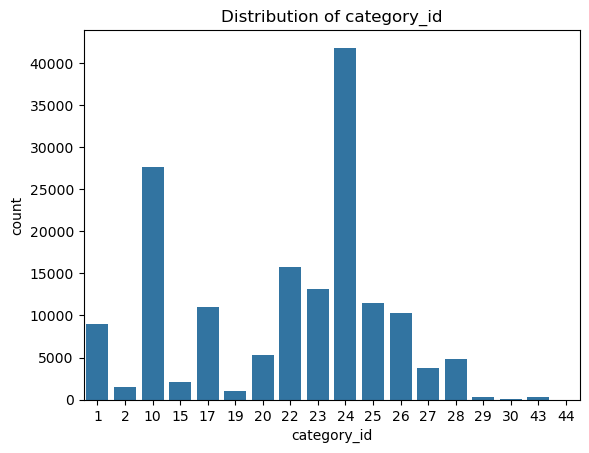

In [24]:
#plotting distribution of the target value
sns.countplot(data=df2,x='category_id')
plt.title('Distribution of category_id')
plt.show()

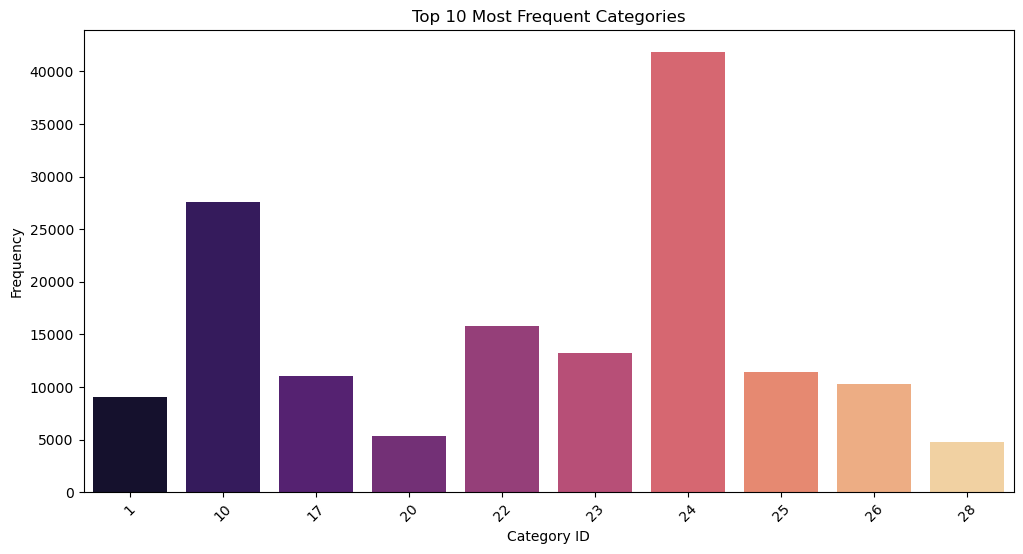

In [25]:
# Count the most frequent categories
top_10_categories = df2['category_id'].value_counts().head(10)

# Plot the top 10 most frequent categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette="magma")
plt.title("Top 10 Most Frequent Categories")
plt.xlabel("Category ID")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

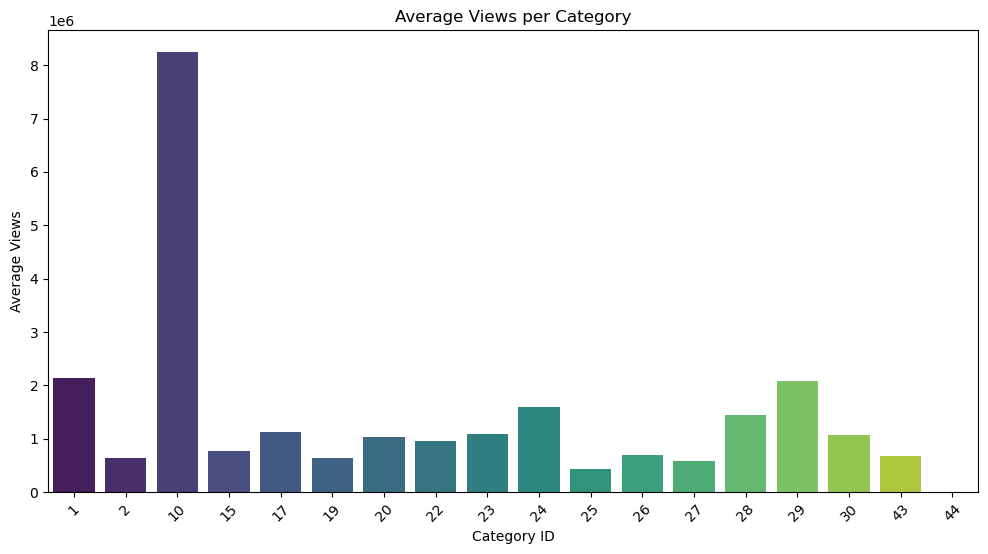

In [26]:
# Group by category and compute average views
category_avg_views = df2.groupby('category_id')['views'].mean().sort_values(ascending=False)

# Plot category-wise average views
plt.figure(figsize=(12, 6))
sns.barplot(x=category_avg_views.index, y=category_avg_views.values, palette="viridis")
plt.title("Average Views per Category")
plt.xlabel("Category ID")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.show()


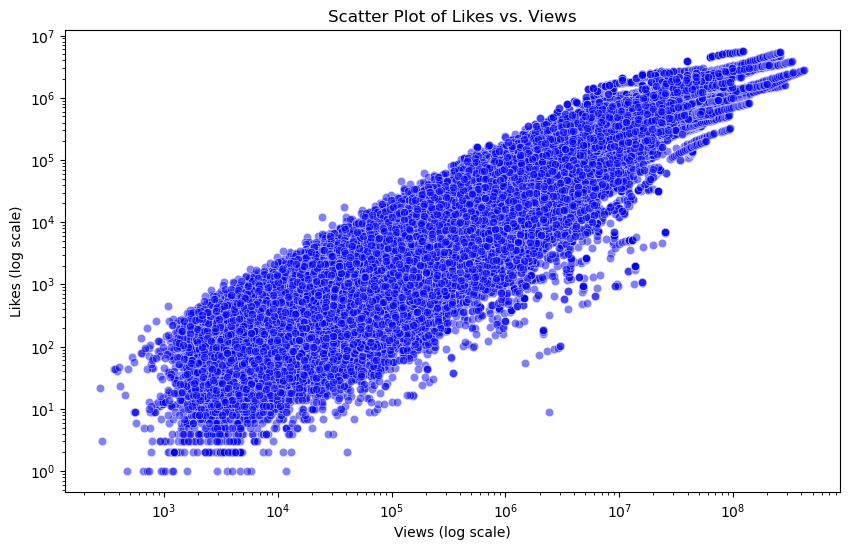

In [27]:
# Scatter plot of Likes vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2['views'], y=df2['likes'], alpha=0.5, color='blue')
plt.xscale('log')  # Log scale for better visibility
plt.yscale('log')
plt.xlabel("Views (log scale)")
plt.ylabel("Likes (log scale)")
plt.title("Scatter Plot of Likes vs. Views")
plt.show()

#### Dividing into categorical and numerical columns

##### categorical columns

In [30]:
cat_columns=df2.select_dtypes(include="object")
cat_columns

,video_id,trending_date,title,channel_title,publish_date,time_frame,published_day_of_week,publish_country,tags
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""..."
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""..."
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ..."
...,...,...,...,...,...,...,...,...,...
161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,2018-06-13,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani..."
161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,2018-06-13,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra..."
161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,2018-06-11,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze..."
161468,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,2018-06-13,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The..."


##### Numerical columns as num_columns

In [32]:
num_columns=df2.select_dtypes(include=["int64","float64"])
num_columns

,category_id,views,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181
3,24,343168,10172,666,2146
4,24,2095731,132235,1989,17518
...,...,...,...,...,...
161465,24,80685,1701,99,1312
161466,24,103339,460,66,51
161467,20,773347,25900,224,3881
161468,25,115225,2115,182,1672


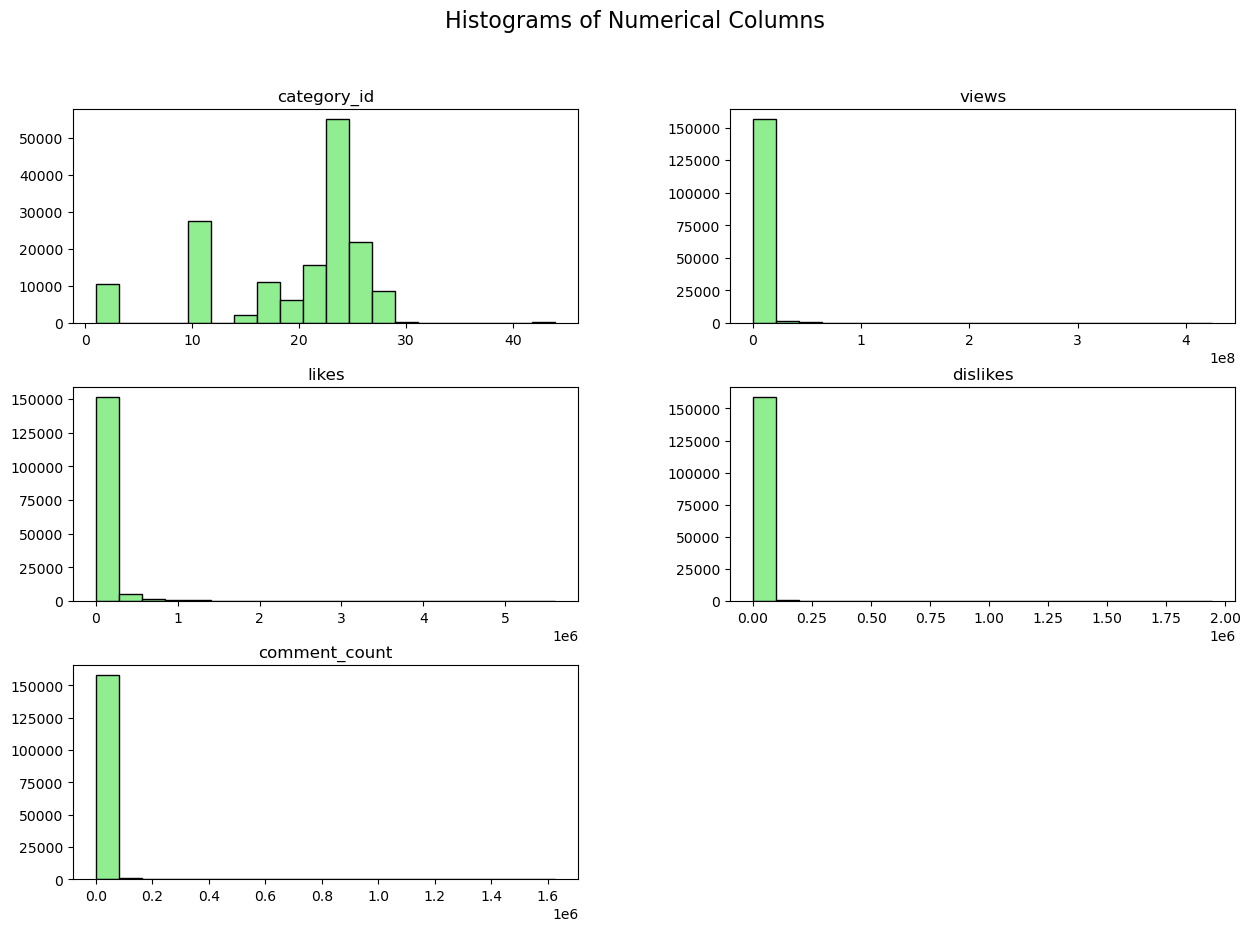

In [33]:
#Plot histograms for numerical columns
num_columns.hist(bins=20, figsize=(15,10), grid=False, color='lightgreen', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

#### Checking for outliers

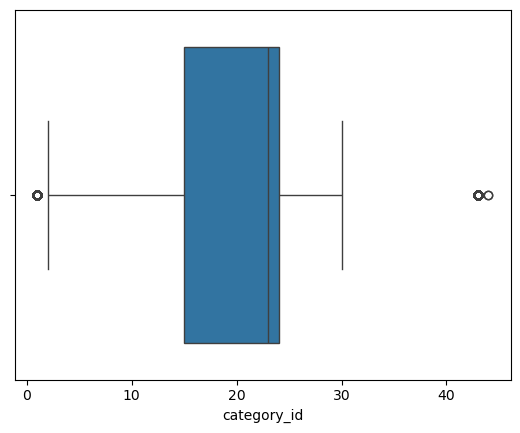

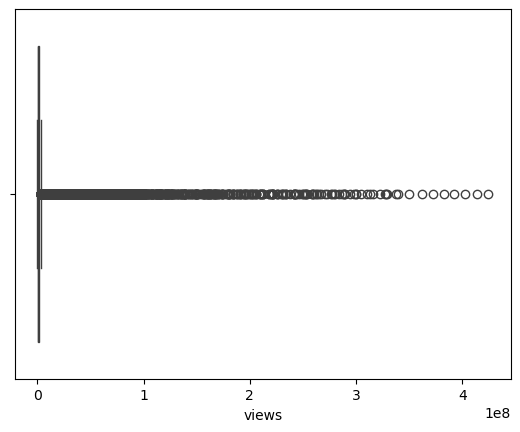

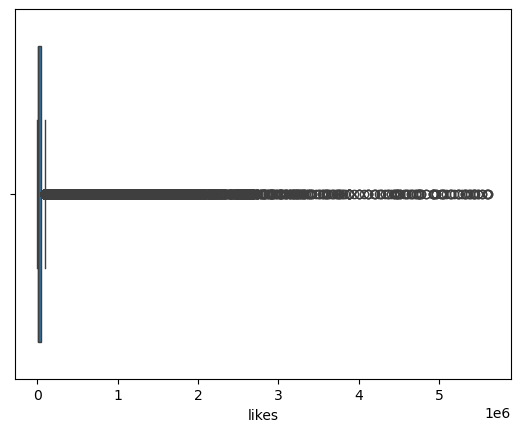

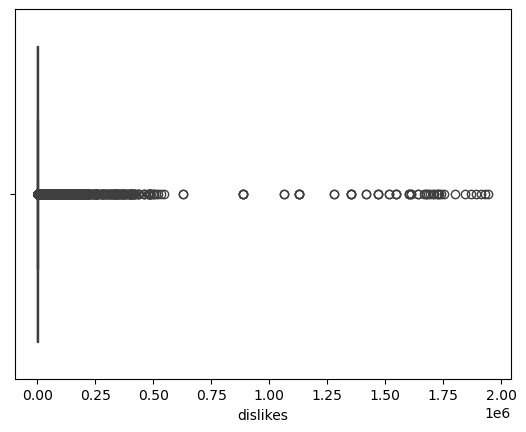

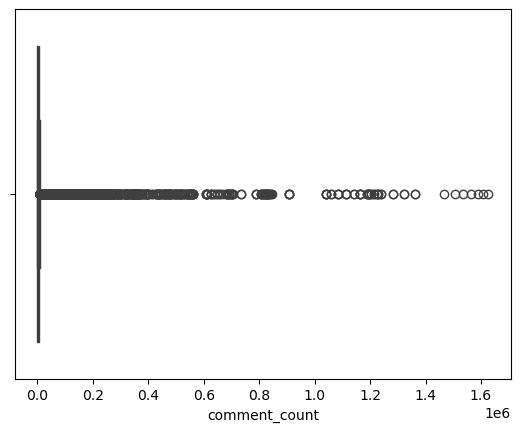

In [35]:
for x in num_columns.columns:
    sns.boxplot(x=df2[x],data=df2)
    plt.show()

#### Removing outliers

In [37]:
#Removing outliers using IQR method

def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [38]:
df3=outliers(df2)

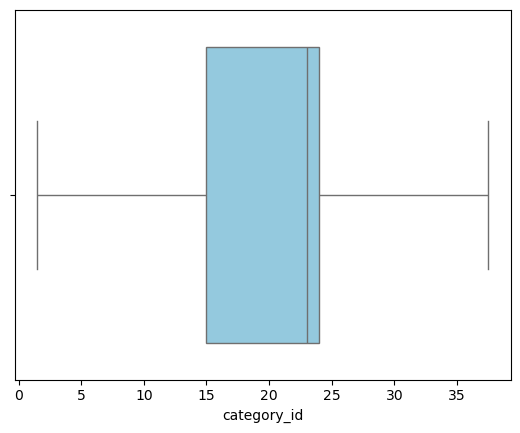

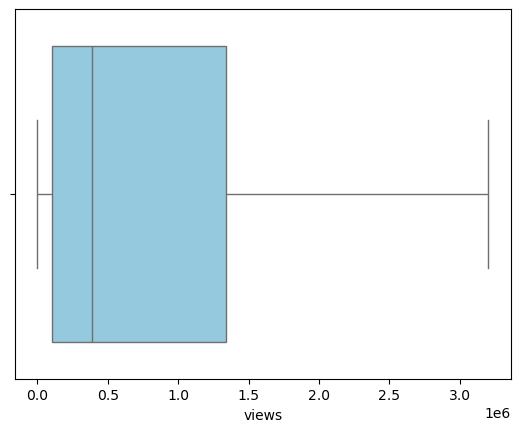

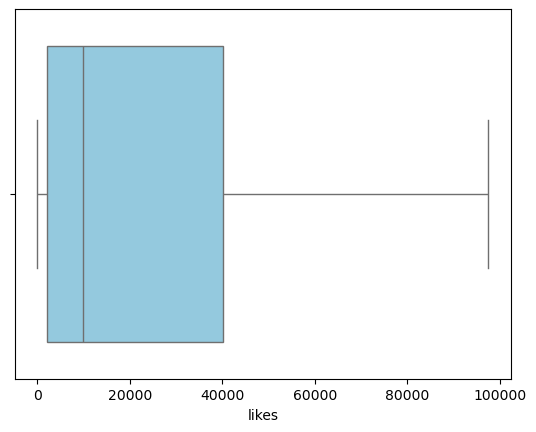

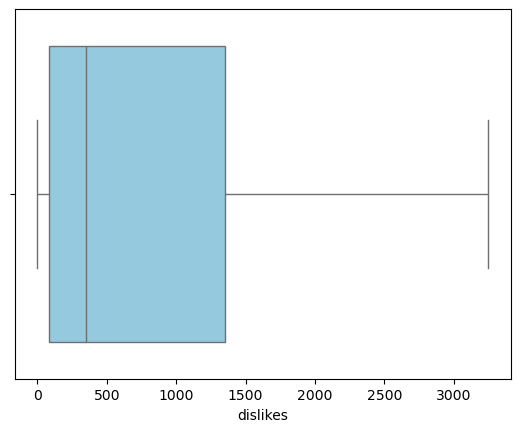

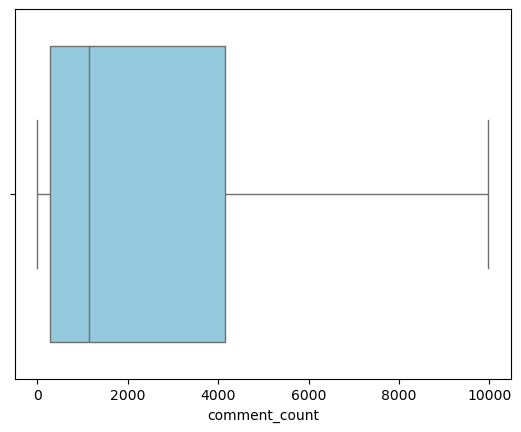

In [39]:
#Boxplot after removing outliers

for col in num_columns:
    sns.boxplot(data=df3, x=col, color='skyblue')
    plt.show()

#### Checking Skewness

In [41]:
df4=df3.select_dtypes(include=["int64","float64"])
df4

,category_id,views,likes,dislikes,comment_count
0,22.0,748374.0,57527.0,2966.0,9975.5
1,24.0,2418783.0,97185.0,3250.0,9975.5
2,23.0,3191434.0,97487.0,3250.0,8181.0
3,24.0,343168.0,10172.0,666.0,2146.0
4,24.0,2095731.0,97487.0,1989.0,9975.5
...,...,...,...,...,...
161465,24.0,80685.0,1701.0,99.0,1312.0
161466,24.0,103339.0,460.0,66.0,51.0
161467,20.0,773347.0,25900.0,224.0,3881.0
161468,25.0,115225.0,2115.0,182.0,1672.0


In [42]:
df4.skew()

category_id     -1.085066
views            1.197261
likes            1.196135
dislikes         1.195343
comment_count    1.195509
dtype: float64

### Between -0.5 and 0.5 are considered fairly symmetrical.
### Between -1 and -0.5 or 0.5 and 1 are moderately skewed.
### Less than -1 or greater than 1 indicate high skewness.

In [44]:
pt = PowerTransformer(method = 'yeo-johnson')

In [45]:
# check numerical features
numerical_features = df4.select_dtypes(include=['float64', 'int64']).columns

In [46]:
df4[numerical_features] = pt.fit_transform(df4[numerical_features])
df4[numerical_features].skew()

category_id     -0.587403
views           -0.092953
likes           -0.117596
dislikes        -0.093133
comment_count   -0.114937
dtype: float64

#### Checking Correlation

In [48]:
corr=df4[numerical_features].corr()

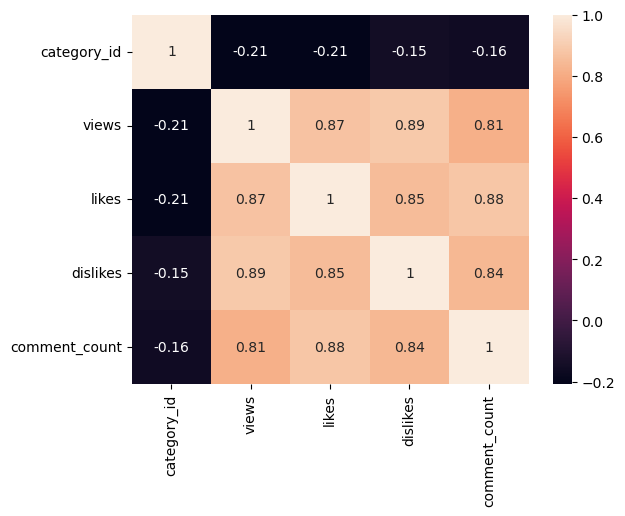

In [49]:
sns.heatmap(corr,annot=True,cmap="rocket")
plt.show()

## Feature Engineering
- Apply Label Encoding to the target variable (`category_id`).

In [51]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for target variable (category_id)
label_encoder = LabelEncoder()
df_label_encoded = df3.copy()  # Create a copy to apply label encoding separately
df_label_encoded['category_no.'] = label_encoder.fit_transform(df_label_encoded['category_id'])

# Display the transformed dataset with Label Encoding
df_label_encoded.head()
df4=df_label_encoded.select_dtypes(include=["int64","float64"])


#### Feature Scaling

In [53]:
X=df4.drop("category_id",axis=1)
y=df4['category_id'].astype(int)

In [54]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [55]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [56]:
df_balanced=pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["category_id"]=y_resampled

In [57]:
print("Orginal target Distrubution:", Counter(y))
print("Resampled target Distribution", Counter(y_resampled))

Orginal target Distrubution: Counter({24: 41824, 10: 27599, 22: 15798, 23: 13198, 25: 11465, 17: 11059, 26: 10335, 1: 9037, 20: 5338, 28: 4789, 27: 3807, 15: 2033, 2: 1534, 19: 986, 29: 335, 37: 300, 30: 17})
Resampled target Distribution Counter({22: 41824, 24: 41824, 23: 41824, 28: 41824, 1: 41824, 25: 41824, 17: 41824, 10: 41824, 15: 41824, 27: 41824, 26: 41824, 2: 41824, 19: 41824, 20: 41824, 29: 41824, 37: 41824, 30: 41824})


In [58]:
sk = SelectKBest(score_func = f_classif, k=10)
x_new = sk.fit_transform(X,y)
# Get selected feature names and scores
selected_features = X.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['views', 'likes', 'dislikes', 'comment_count', 'category_no.'], dtype='object')

Feature Scores:
         Feature        Score
4   category_no.          inf
1          likes  2441.218219
0          views  1637.108430
2       dislikes  1204.925998
3  comment_count  1111.830325


In [59]:
X_selected=X[selected_features]

In [60]:
X_selected.columns

Index(['views', 'likes', 'dislikes', 'comment_count', 'category_no.'], dtype='object')

#### Scaling

In [62]:
# Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_selected)

In [63]:
#Split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state = 42)

In [64]:
print(f"x_train:{X_train.shape},x_test:{X_test.shape},y_train:{y_train.shape},y_test:{y_test.shape}")

x_train:(127563, 5),x_test:(31891, 5),y_train:(127563,),y_test:(31891,)


### Model Comparison

In [66]:
models ={
    '1.Logistic Regression':LogisticRegression(),
    '2.SVC':SVC(),
    '3.Decision Tree Classifier':DecisionTreeClassifier(),
    '4.Random Forest Classifier':RandomForestClassifier(),
    '5.Gradient Boosting Classifier':GradientBoostingClassifier(),
    '6.Ada Boost Classifier':AdaBoostClassifier(),
    '7.Naive Bayes':GaussianNB()
}

In [67]:
results ={}
for name,model in models.items():
    print(f"\nTraining Name{name}--->")
    model.fit(X_train,y_train)
    y_pred    = model.predict(X_test)
    accuracy  = accuracy_score(y_test,y_pred)
    results[name]= {
        'model':model,
        'accuracy':accuracy_score,
        'Report':classification_report(y_test,y_pred)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassificationReport")
    print(results[name]['Report'])


Training Name1.Logistic Regression--->
1.Logistic Regression Accuracy: 0.9746

ClassificationReport
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1780
           2       0.99      0.88      0.93       296
          10       0.97      1.00      0.99      5611
          15       0.98      0.13      0.23       400
          17       0.84      1.00      0.91      2183
          19       0.00      0.00      0.00       185
          20       0.99      1.00      0.99      1026
          22       1.00      1.00      1.00      3190
          23       1.00      1.00      1.00      2649
          24       1.00      1.00      1.00      8284
          25       0.99      0.98      0.99      2303
          26       0.97      0.99      0.98      2131
          27       1.00      0.91      0.95       746
          28       0.88      1.00      0.93       965
          29       0.00      0.00      0.00        76
          30       0.00      0.00 

### Hyperparameter Tunning

In [68]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=20, scoring='accuracy', 
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found:", random_search.best_params_)

# Evaluate the best model
y_pred = random_search.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Accuracy: 0.9998745727634756
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1780
           2       1.00      1.00      1.00       296
          10       1.00      1.00      1.00      5611
          15       1.00      1.00      1.00       400
          17       1.00      1.00      1.00      2183
          19       1.00      1.00      1.00       185
          20       1.00      1.00      1.00      1026
          22       1.00      1.00      1.00      3190
          23       1.00      1.00      1.00      2649
          24       1.00      1.00      1.00      8284
          25       1.00      1.00      1.00      2303
          26       1.00      1.00      1.00      2131
          27       1.00      1.00      1.00       746


In [121]:
best_model = random_search.best_estimator_

### Evaluate the Best Model on the test set

In [123]:
y_pred = best_model.predict(X_test)

In [125]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [127]:
print(f"Test Accuracy: {accuracy}")
print(f"Test Weighted F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9998745727634756
Test Weighted F1 Score: 0.9998726415272371

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1780
           2       1.00      1.00      1.00       296
          10       1.00      1.00      1.00      5611
          15       1.00      1.00      1.00       400
          17       1.00      1.00      1.00      2183
          19       1.00      1.00      1.00       185
          20       1.00      1.00      1.00      1026
          22       1.00      1.00      1.00      3190
          23       1.00      1.00      1.00      2649
          24       1.00      1.00      1.00      8284
          25       1.00      1.00      1.00      2303
          26       1.00      1.00      1.00      2131
          27       1.00      1.00      1.00       746
          28       1.00      1.00      1.00       965
          29       0.96      0.99      0.97        76
          30       1.00      0.75